## Data Mining and Machine Learning - Project
### Detecting Difficulty Level of French Texts

In this project, we performed a text classification task using four different machine learning models: Logistic Regression, k-Nearest Neighbors (kNN), Decision Tree, and Random Forest. The dataset consists of sentences labeled with difficulty levels.

After training each model on the labeled training data, we evaluated their performance on a separate test set. Performance metrics such as precision, recall, F1-score, and accuracy were calculated to assess the effectiveness of each model in classifying the difficulty levels of sentences. The best hyperparameters found during the optimization process were used to build the final models.

This analysis was conducted without data augmentation or feature engineering, focusing on the baseline performance of each model.




**Overview**

After evaluating several machine learning models for text classification on our dataset of sentences labeled with difficulty levels, the Logistic Regression model emerged as the best performer among the tested models. However, it achieved an accuracy of 47.5%.

An accuracy of 47.5% indicates room for improvement. (data augmentation, feature engineering, or experimenting with more advanced models)

imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify the file path
file_path_test = "Dataset/unlabelled_test_data.csv"
file_path_training = "Dataset/training_data.csv"

# Read the CSV file
unlabelled_test_data = pd.read_csv(file_path_test, index_col=0)
training_data = pd.read_csv(file_path_training, index_col=0)

The provided code separates the input features (sentences) from the target variable (difficulty) and splits the training data into two sets (80% training, 20% testing).

In [3]:
# Split data into features (X) and target variable (y)
X = training_data['sentence']
y = training_data['difficulty']

# Split data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Logistic Regression

In [5]:
pipeline = make_pipeline(CountVectorizer(), LogisticRegression())

# Hyperparameter grid for Logistic Regression
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Hyperparameter optimization
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Logistic Regression model
best_logreg_model = grid.best_estimator_

# Predictions on the test data
y_pred = best_logreg_model.predict(X_test)

/Users/phil/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/phil/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [6]:
# Results
print("Results for Logistic Regression:")
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Results for Logistic Regression:
Best hyperparameters: {'logisticregression__C': 1}
Precision: 0.474337475853334
Recall: 0.475
F1-score: 0.4692096555458588
Accuracy: 0.475


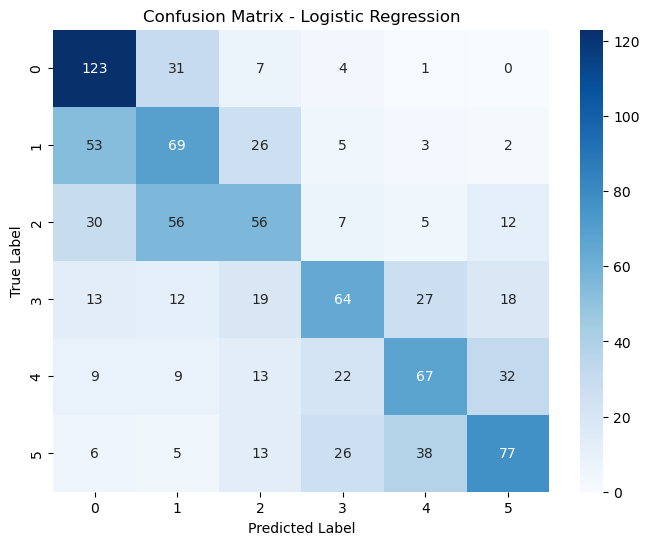

In [7]:
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression')

### kNN

In [8]:
pipeline = make_pipeline(CountVectorizer(), KNeighborsClassifier())

# Hyperparameter grid for k-Nearest Neighbors
param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
              'kneighborsclassifier__weights': ['uniform', 'distance']}

# Hyperparameter optimization using GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best k-Nearest Neighbors model
best_knn_model = grid.best_estimator_

# Predictions on the test data
y_pred = best_knn_model.predict(X_test)

In [9]:
# Results
print("Results for kNN:")
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Results for kNN:
Best hyperparameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Precision: 0.3475671808655961
Recall: 0.23229166666666667
F1-score: 0.1810475748736965
Accuracy: 0.23229166666666667


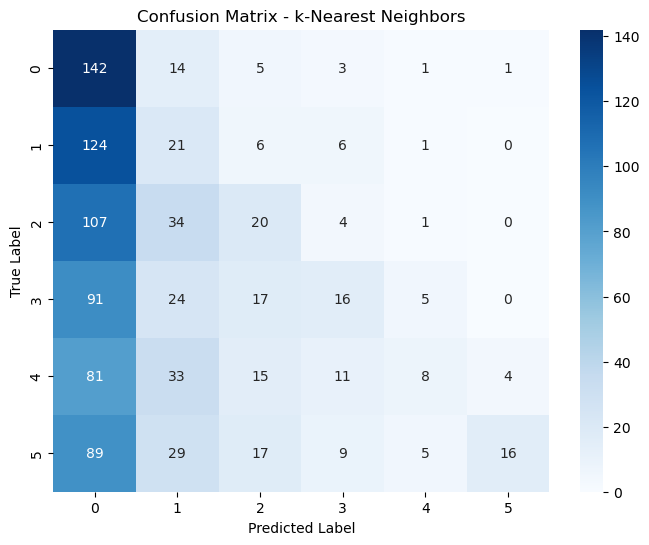

In [10]:
plot_confusion_matrix(y_test, y_pred, 'k-Nearest Neighbors')

### Decision Tree

In [11]:
pipeline = make_pipeline(CountVectorizer(), DecisionTreeClassifier())

# Hyperparameter grid for Decision Tree
param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
              'decisiontreeclassifier__min_samples_split': [2, 5, 10],
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]}

# Hyperparameter optimization using GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Decision Tree model
best_knn_model = grid.best_estimator_

# Predictions on the test data
y_pred = best_knn_model.predict(X_test)

In [12]:
# Results
print("Results for Decision Tree:")
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Results for Decision Tree:
Best hyperparameters: {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Precision: 0.32440107031432003
Recall: 0.3260416666666667
F1-score: 0.3145839431836381
Accuracy: 0.3260416666666667


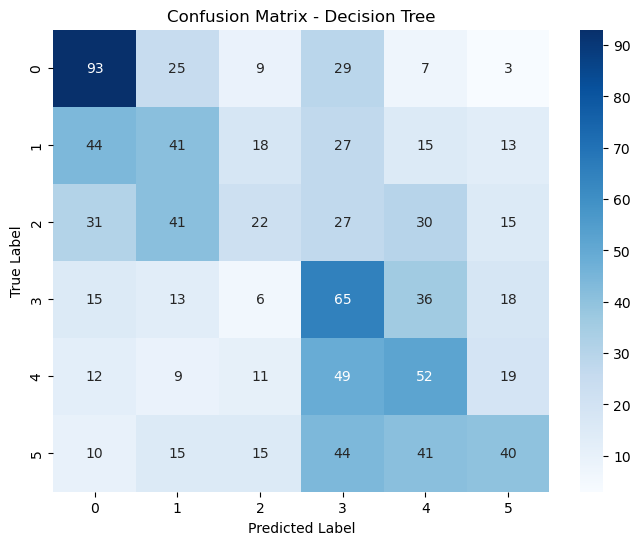

In [13]:
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

### Random Forests

In [14]:
pipeline = make_pipeline(CountVectorizer(), RandomForestClassifier())

# Hyperparameter grid for Random Forest
param_grid = {'randomforestclassifier__n_estimators': [50, 100, 150],
              'randomforestclassifier__max_depth': [None, 10, 20, 30],
              'randomforestclassifier__min_samples_split': [2, 5, 10],
              'randomforestclassifier__min_samples_leaf': [1, 2, 4],
              'randomforestclassifier__bootstrap': [True, False]}

# Hyperparameter optimization using GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = grid.best_estimator_

# Predictions on the test data
y_pred = best_rf_model.predict(X_test)

In [15]:
# Results
print("Results for Random Forests:")
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Results for Random Forests:
Best hyperparameters: {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 100}
Precision: 0.40962336871401417
Recall: 0.415625
F1-score: 0.390226424216275
Accuracy: 0.415625


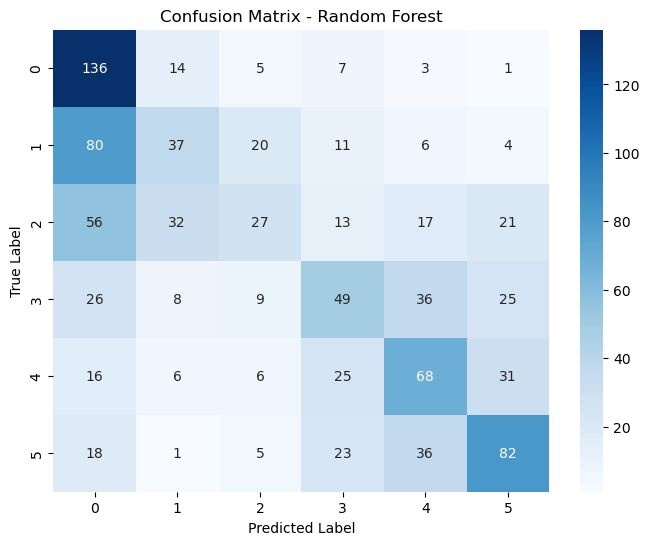

In [16]:
plot_confusion_matrix(y_test, y_pred, 'Random Forest')